# Useful libraries for scientific computing

In this section we review some additional libraries that are very useful for scientific computing.

## `scipy` 

This module contains a collection of numerical algorithms such as integration,
optimization, interpolation, linear algebra, statistics, and much more.
It is built on top of `numpy`, i.e., it mainly uses numpy arrays as the main
data structure.

`scipy` is organized in submodules, each one with a specific purpose, which are imported separately as,

```python
import scipy.submodulename
#or
from scipy import submodulename
```

The submodules that normally fulfill the needs of a computational chemist are:

- `integrate`: Integration and ordinary differential equation solvers
- `interpolate`: Interpolation and smoothing splines
- `optimize`: Optimization and root-finding routines
- `linalg`: Linear algebra, which actually provides an interface to BLAS and LAPACK libraries.
Note that it generally supports all `numpy.linalg` functions, and `scipy.linalg` versions are preferred.

The list of submodules is completed with:

- `cluster`: Clustering algorithms
- `fft`: Fast Fourier Transform routines (this should replace the still existing `fftpack` module)
- `ndimage`: N-dimensional image processing
- `odr`: Orthogonal distance regression
- `signal`: Signal processing
- `sparse`: Sparse matrices and associated routines
- `spatial`: Spatial data structures and algorithms
- `special`: Special functions
- `stats`: Statistical distributions and functions
- `constants`: Physical and mathematical constants
- `io`: Input and Output
- `misc`: Miscellaneous utilities that don’t have another home.

In the following, we will take a deeper look at the submodules
`integrate`, `interpolate` and `optimize`.

### `scipy.integrate`

This submodule provides several integration routines, including an ordinary 
differential equation integrator.

**Integration** of a 1D function, can be done with the `quad` method, which uses the
[QUADPACK](https://en.wikipedia.org/wiki/QUADPACK) Fortran library. For instance

In [1]:
from scipy.integrate import quad
import numpy as np

def gaussian(x, mu, sigma):
    return 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(x-mu)**2/(2*sigma**2))

mu = 0
sigma = 1
norm, err = quad(gaussian, -np.inf, np.inf, args=(mu, sigma))
print(norm)

0.9999999999999997


Other methods to integrated 1D functions are `fixed_quad`, `quadrature` or `romberg`.

Instead, integration of a discrete function (1D), i.e., a set of points,
can be done with the `trapz`, `romb` and `simps` functions.
For instance,

In [2]:
from scipy.integrate import simps
import numpy as np

def gaussian(x, mu, sigma):
    return 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(x-mu)**2/(2*sigma**2))

x = np.linspace(-100, 100, 5000)
mu = 0
sigma = 1
y = gaussian(x, mu, sigma)
print(simps(y, x=x))

1.0000000000000002


Functions for multidimensional integration are also available:

- `dblquad`: General purpose double integration.
- `tplquad`: General purpose triple integration.
- `nquad`: General purpose n-integration.

This submodule also provides methods to integrate **ordinary differential equations**. 
The recommended method is `solve_ivp` (solve initial value problem), 
which is a modern integrator for ordinary differential equations.

For instance, in order to integrate the following system of differential equations,

$$
\begin{align}
\frac{dx}{dt} &= -y \\
\frac{dy}{dt} &= x
\end{align}
$$
we can use the following code,

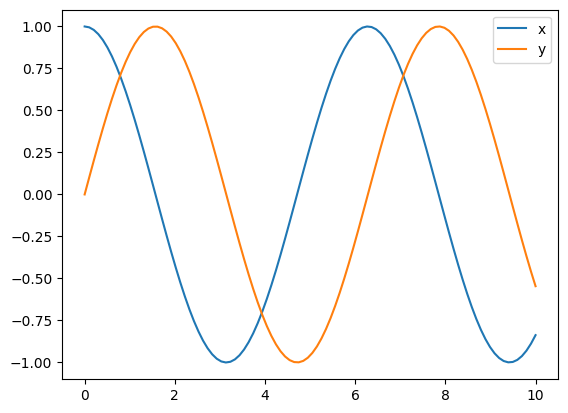

In [3]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

def f(t, y):
    return [-y[1], y[0]]
    
t0 = 0
tf = 10
y0 = [1, 0]
t_eval = np.linspace(t0, tf, 100)
sol = solve_ivp(f, [t0, tf], y0, t_eval=t_eval)

plt.plot(sol.t, sol.y[0], label='x')
plt.plot(sol.t, sol.y[1], label='y')
plt.legend()
plt.show()

The integration algorithm is set with the `method` attribute. Available methods are
summarized in the following table.

| Method | Description                                                                                                                      |
| --- |----------------------------------------------------------------------------------------------------------------------------------|
| `RK45` | Explicit Runge-Kutta method of order 5(4). This is the default method.                                                           |
| `RK23` | Explicit Runge-Kutta method of order 3(2).                                                                                       |
| `DOP853` | Explicit Runge-Kutta method of order 8.                                                                                          |
| `Radau` | Implicit Runge-Kutta method of the Radau IIA family of order 5.                                                                  |
| `BDF` | Implicit multi-step variable-order (1 to 5) method based on a backward differentiation formula for the derivative approximation. |
| `LSODA` | Adams/BDF method with automatic stiffness detection and switching.                                                               |

The  older `odeint` function is also available, and provides a robust integrator
for ordinary differential equations based on the
FORTRAN library [odepack](https://computing.llnl.gov/projects/odepack).
It is still extensively used, mainly in legacy code.

### `scipy.interpolate`

This submodule provides several interpolation routines. In the case of 1D interpolation, i.e.
from a discrete set of $(x,y)$ points, the most common method is `interp1d`. This function takes
as arguments the `x` and `y` arrays, and returns a function that can be evaluated at any point,
within the range of `x` (values out of this range can be managed with the `fill_value` argument).
For instance,

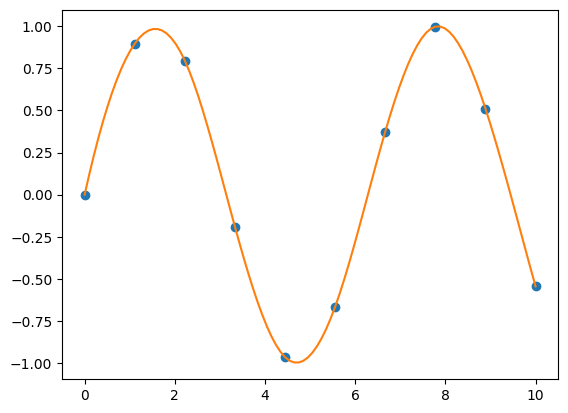

In [4]:
from scipy.interpolate import interp1d
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 10)
y = np.sin(x)
f = interp1d(x, y, kind='cubic')

xnew = np.linspace(0, 10, 100)
ynew = f(xnew)

plt.plot(x, y, 'o', xnew, ynew, '-')
plt.show()

As shown in the above example, the `kind` argument specifies the type of interpolation. Possible
values are indicated in the following table.

| Kind | Description |
| --- | --- |
| `linear` | Linear interpolation (default). |
| `nearest` | Nearest-neighbor interpolation. |
| `zero` | Zero-order hold interpolation. |
| `slinear` | Piecewise linear interpolation. |
| `quadratic` | Piecewise quadratic interpolation. |
| `cubic` | Piecewise cubic interpolation. |
| `previous` | Use previous value. |
| `next` | Use next value. |

For 2D interpolation, the most general function is `interp2d`. This function takes as arguments
a 2D array of values, `Z`, and the two 1D arrays of coordinates, `x` and `y`. These arrays
do not have to be equally spaced. As in the 1D case, it returns a function that can be evaluated 
at any point.

/tmp/ipykernel_1992/2829103246.py:10: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://gist.github.com/ev-br/8544371b40f414b7eaf3fe6217209bff`

  f = interp2d(x, y, Z, kind='cubic')
/tmp/ipykernel_1992/2829103246.py:14: DeprecationWarning:         `interp2d` is deprecated!
        `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

        For legacy code, nearly bug-for-bug compatible replacements are
        `RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
        scattered 2D data.

        In new code, for regular grids use `RegularGr

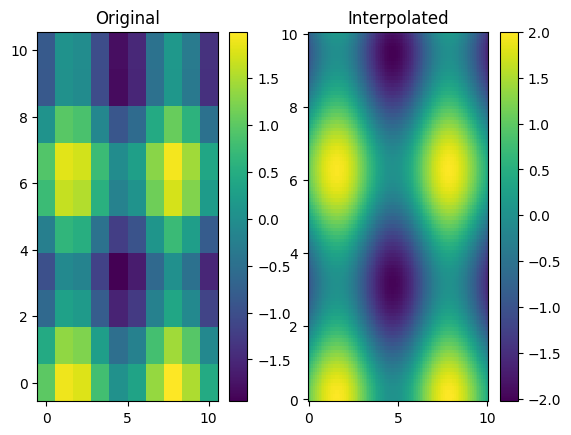

In [5]:
from scipy.interpolate import interp2d
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 10)
y = np.linspace(0, 10, 10)
X, Y = np.meshgrid(x, y)
Z = np.sin(X) + np.cos(Y)

f = interp2d(x, y, Z, kind='cubic')

xnew = np.linspace(0, 10, 100)
ynew = np.linspace(0, 10, 100)
znew = f(xnew, ynew)

plt.subplot(1, 2, 1)
plt.pcolormesh(X, Y, Z)
plt.colorbar()
plt.title('Original')
plt.subplot(1, 2, 2)
plt.pcolormesh(xnew, ynew, znew)
plt.colorbar()
plt.title('Interpolated')
plt.show()

As you can see, we use some kind of *advanced* `matplotlib` features in this example. 
You can refresh them going back to the [previous chapter](plotting.md).
We also use the `np.meshgrid` function, which is very useful to generate 2D arrays with 
the grid points, (`x`,`y`), from the 1D arrays, `x` and `y`. The interpolation method is
specified with the `kind` argument, which can take the same values as in the 1D case.

The above example uses a regular grid, but this is not a requirement. Actually, in this case
we can use the function `RectBivariateSpline`, which is more efficient. This function takes
the same arguments as `interp2d`.

To interpolate unstructured data we can use the function `griddata`. 
It takes as arguments the coordinates of the data points as a tuple of 1D arrays,
`(x,y)` and the values at these points, `z`, also a 1D array. 
It also takes the coordinates of the points where the interpolation is required, `(Xi,Yi)`. 
In this case, it returns the interpolated values at these points as a 2D array `Zi`.
The interpolation method is specified with the `method` argument. Possible values are `linear`,
`nearest` and `cubic`.

### `scipy.optimize`

This module provides several algorithms for optimization (locating minima and maxima) and 
root-finding.

The function `minimize` provides a common interface to all the **optimization** algorithms.
It takes as arguments the function to be minimized, `f(x)`, the initial guess, `x0`, and
the method to be used, `method`. The function to be minimized must take as argument a 1D array
with the values of the variables to be optimized, and return a scalar. For instance,

In [6]:
from scipy.optimize import minimize
import numpy as np

def f(x):
    return np.sum(x**2)
    
x0 = np.array([1, 2, 3])
res = minimize(f, x0, method='Nelder-Mead')
print(res.x)

[-4.80659631e-05 -1.10944154e-05 -1.86599703e-05]


As shown above, the `minimize` function returns an object with the results of the optimization.
The `x` attribute contains the values of the variables that minimize the function. Other 
attributes of the result object are `fun`, which contains the value of the function at the
minimum, `success`, which is a boolean indicating if the optimization was successful, or the
number of iterations, `nit`, among others.

Possible methods are `Nelder-Mead`, `Powell`, `CG`, `BFGS`, `Newton-CG`, `L-BFGS-B`, `TNC`,
`COBYLA`, `SLSQP` and `trust-constr`. The default method is `BFGS`. The choice of the method
depends on the problem (stiffness, dimensionality, etc.), and the need of adding constraints,
as not all the methods are compatible with constraints.
More details can
be found in the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize).

For **root-finding** of scalar functions (univariate functions, i.e., which depend on only 
one variable), we can use the general interface function `root_scalar`.
It takes as arguments the function to be solved, `f(x)`, the initial guess, `x0`, and
the method to be used, `method`. The function to be solved must take as argument a scalar
and return a scalar. For instance,

In [7]:
from scipy.optimize import root_scalar
import numpy as np

def f(x):
    return x**2 - 1
    
res = root_scalar(f, x0=0.5, method='bisect')
print(res.root)

ValueError: Bracket needed for bisect

Again, the `root_scalar` function returns an object with the results of the root-finding.
The `root` attribute contains the value of the variable that solves the equation.

The function `root` provides a common interface to all the root-finding algorithms
for vector functions (i.e, a system of `N` equations that depend on `N` variables).
It takes as arguments the function to be solved, `f(x)`, which depends on a 1D array (vector) 
of `N` variables, `x`, the initial guess, `x0`, and
the method to be used, `method`. The function to be solved must take as argument a 1D array
with the values of the variables to be solved, and returns a 1D array with the same shape.
For instance, the following system of equations:

$$
\begin{align}
x^2 + y^2 = 1 \\
x - y = 0
\end{align}
$$
can be solved as follows:

In [8]:
from scipy.optimize import root
import numpy as np

def f(x):
    return np.array([x[0]**2 + x[1]**2 - 1, x[0] - x[1]])

x0 = np.array([1, 2])
res = root(f, x0, method='hybr')
print(res.x)

[0.70710678 0.70710678]


Available methods are summarized in the [documentation](https://docs.scipy.org/doc/scipy/reference/optimize.html#root-finding)
of this function.

## `sympy`

This module is a computer algebra system (CAS), such as [Maxima](https://maxima.sourceforge.io) 
or Mathematica. In allows to perform symbolic calculations, such as derivatives, integrals,
solving equations, etc. It might not be as powerful as the other CAS, but it is very useful 
to integrate simple calculations in your python workflow.

## `pandas`

This module provides high-performance, easy-to-use data structures and data analysis tools.

## `h5py`

This module provides support to manipulate [HDF5](https://en.wikipedia.org/wiki/HDF5) files, 
a format specifically designed to store large amounts of numerical data. 
There are other formats that are also very useful for this purpose, such as
[netCDF](https://www.unidata.ucar.edu/software/netcdf/),
[JSON](https://en.wikipedia.org/wiki/JSON) or
[XML](https://en.wikipedia.org/wiki/XML), which are also supported by Python modules.